In [47]:
### import packages here

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import mwlmc

import mwlmc_util
import mwlmc_plot

import importlib
importlib.reload(mwlmc_util)
importlib.reload(mwlmc_plot)

<module 'mwlmc_plot' from '/Users/sl01701/Documents/Projects/code/mwlmc/tutorial/mwlmc_plot.py'>

### Introduction 

The simulations consists of expansion of the Milky Way stellar component 
(`mwd`), the Milky Way halo (`mwhalo`), and the Large Magellanic Cloud halo 
(`lmc`). In this tutorial, we present how we can access the potential, 
densities, and forces of the different expansions. A tutorial on how to run 
orbits incthe full simulation can be found in the 
[orbits tutorial](orbits_tutorial.ipynb). The advantage of this type of 
simulation is that we can select different moments (such as the dipole or 
quadrupole), and see how this affects all these outputs. For a more detailed 
explanation and example, see e.g.Lilleengen et al. 2022. We also provide the 
option to run orbits in the static, unperturbed Milky Way potential from [Erkal et al. 2019](https://ui.adsabs.harvard.edu/link_gateway/2019MNRAS.487.2685E/doi:10.1093/mnras/stz1371).


Let's get started. To access the simulation, first, we need to initialize the 
expansions. Afterwards, the functions will be callable via the Model instance:

In [2]:
Model = mwlmc.MWLMC()

Initialising MW ... 


sphcache::read_sph_cache: trying to read cached table . . . success!!
sphcache::read_sph_cache: trying to read cached table . . . success!!
cylcache::read_cyl_cache: trying to read cached table . . . success!!


sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising LMC ... 
sphcoefs::read_coef_file: reading coefficients from file . . . success!!
Initialising MW disc ... 
cylcoefs::read_coef_file: reading NUMT, LMAX, NORDER from file . . . success!!


### Test documentation


In [3]:
mwlmc.MWLMC?

Docstring:      <no docstring>
Init docstring: __init__(self: mwlmc.MWLMC) -> None
File:           ~/Documents/Projects/code/mwlmc/mwlmc.cpython-38-darwin.so
Type:           pybind11_type
Subclasses:     


In [4]:
get_harmonic_flag?

Object `get_harmonic_flag` not found.


In [5]:
Model.get_lmc_trajectory?

Docstring:
get_lmc_trajectory(self: mwlmc.MWLMC, dt: float = 0.000125) -> numpy.ndarray[numpy.float64[m, n]]


Get the LMC trajectory (relative to the MW disc centre).
Type:      method


In [6]:
Model.lmc_fields?

Docstring:
lmc_fields(*args, **kwargs)
Overloaded function.

1. lmc_fields(self: mwlmc.MWLMC, t: float, x: List[float], y: List[float], z: List[float], globalframe: bool = False, lmcharmonicflag: int = 127, verbose: bool = False) -> numpy.ndarray[numpy.float64[m, n]]


                Return all fields for the LMC halo (in the frame of the LMC).

                Parameters
                ----------
                t : float
                x, y, z : float
                globalframe : bool = False
                lmcharmonicflag : int = 127
                verbose : bool = False

                Returns

                -------
                fx, fy, fz : float
                density : float
                potential : float

            

2. lmc_fields(self: mwlmc.MWLMC, t: float, x: float, y: float, z: float, globalframe: bool = False, lmcharmonicflag: int = 127, verbose: bool = False) -> List[float]
Type:      method


In [7]:
Model.rewind?

Docstring:
rewind(*args, **kwargs)
Overloaded function.

1. rewind(self: mwlmc.MWLMC, xinit: List[float], vinit: List[float], dt: float = 0.002, mwhharmonicflag: int = 127, mwdharmonicflag: int = 127, lmcharmonicflag: int = 127, rewindtime: float = 2.5, discframe: bool = True) -> numpy.ndarray[numpy.float64[m, n]]

2. rewind(self: mwlmc.MWLMC, xinit: numpy.ndarray[numpy.float64[m, n]], vinit: numpy.ndarray[numpy.float64[m, n]], dt: float = 0.002, mwhharmonicflag: int = 127, mwdharmonicflag: int = 127, lmcharmonicflag: int = 127, rewindtime: float = 2.5, discframe: bool = True) -> List[numpy.ndarray[numpy.float64[m, n]]]

Compute an orbit rewind in all three components.

                Parameters
                ----------
                xinit : array-like
                vinit : array-like
                dt :

                Returns
                -------
            
Type:      method


### Potential, density, and forces

Let's first have a look at the simulation. We can access densities of both 
halos, the potentials of all three components, and forces of all three 
components. This can be done at a single position, or with an array of 
positions. 

#### Getting these properties at one position 

The forces, density, and potential are all returned by the fields 
functions: `mwhalo_fields`, `lmc_fields`, `mwd_fields`. Let's look at the 
`mwhalo` field at the Sun's position today:

In [8]:
t = 0.
x, y, z = -8.27, 0., 0.
fx, fy, fz, dens, pot = Model.mwhalo_fields(t, x, y, z)
mwlmc_util.print_field_info(fx, fy, fz, dens, pot)

f_x = 2377.41 [km/s^2]
f_y = -77.14 [km/s^2]
f_z = -370.68 [km/s^2]
rho = 9.51e-03 [Msun/pc^3]
Phi = -5.310829e+14 [(km/s)^2]


These are the values at the Sun's position in the fully live expansion (by
default). Let's see whether there is a difference in the monopole. We can select different harmonic moments via the `mwdhharmonicflag`. A more detailed 
explanation is given further below.

In [9]:
t = 0.
x, y, z = -8.27, 0., 0.
fx, fy, fz, dens, pot = Model.mwhalo_fields(t, x, y, z, mwhharmonicflag=0)
mwlmc_util.print_field_info(fx, fy, fz, dens, pot)

f_x = 2377.82 [km/s^2]
f_y = -0.00 [km/s^2]
f_z = -0.00 [km/s^2]
rho = 8.98e-03 [Msun/pc^3]
Phi = -5.308147e+14 [(km/s)^2]


We can immediately see that the deformations added forces in the $y$- and 
$z$-direction. 

We can also get these informations at other times. $t=0$ Gyr is at the current 
time, and the simulation allows us to look back in time (i.e. negative times).
Let's get the properties 1 Gyr ago:


In [10]:
t = -1.
x, y, z = -8.27, 0., 0.
fx, fy, fz, dens, pot = Model.mwhalo_fields(t, x, y, z)
mwlmc_util.print_field_info(fx, fy, fz, dens, pot)

f_x = 2515.00 [km/s^2]
f_y = 24.71 [km/s^2]
f_z = -22.16 [km/s^2]
rho = 1.00e-02 [Msun/pc^3]
Phi = -5.332048e+14 [(km/s)^2]


We see a stark change in the force in $z$-directions. It seems that the 
deformations were the strongest within the last Gyr.

#### Evaluation these properties for arrays 

These properties are often more insightful for an array of positions. We can 
e.g. get these values over a grid in the $y-z$-plane. We put in a vector for 
each direction:


In [11]:
# make grid
y = np.arange(-50, 51, 5)
z = np.arange(-50, 51, 5)
Ym, Zm = np.meshgrid(y, z)
Y, Z =  Ym.ravel(), Zm.ravel()
X = np.zeros(len(Y))

In [12]:
t = 0.
fields = Model.mwhalo_fields(t, X, Y, Z)

dens = fields[:,3]
dens = dens.reshape((len(y), len(z)))

Let's have a look (we supplied some simple plotting functions with 
`mwlmc_plots`, adapt as you need!)

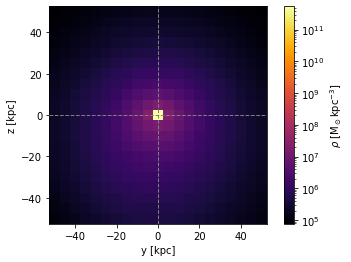

In [13]:
fig, ax = mwlmc_plot.plot_density(Ym, Zm, dens,
                                  cmap = plt.cm.inferno, 
                                  norm = LogNorm())
plt.show()

Again, lets compare to the monopole: 

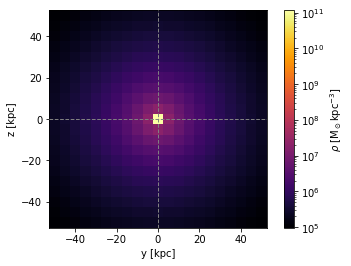

In [14]:
t = 0.
fields = Model.mwhalo_fields(t, X, Y, Z, mwhharmonicflag=0)

dens = fields[:,3]
dens = dens.reshape((len(y), len(z)))

fig, ax = mwlmc_plot.plot_density(Ym, Zm, dens, 
                                  cmap = plt.cm.inferno, 
                                  norm = LogNorm())
plt.show()

The same way, you can calculate the potential field (with `pot = fields[:,4]`) 
or the forces.

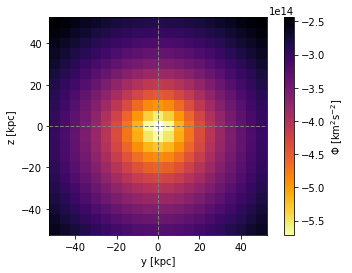

In [15]:
# get the live model fields again
fields = Model.mwhalo_fields(t, X, Y, Z)

pot = fields[:,4]
pot = pot.reshape((len(y), len(z)))

fig, ax = mwlmc_plot.plot_potential(Ym, Zm, pot, cmap = plt.cm.inferno_r)
plt.show()

#### Choosing the harmonic moment of the deformation

The same way, we can get forces, potential, and density for the LMC. Let's look
at its density in different spherical harmonic moments. For this, we can use 
the `lmcharmonicflag` for the LMC (and `mwhharmonicflag` for the `mwhalo` and 
`mwdharmonicflag` for the `mwd`). These flags are unique to the moments we want
to choose (by default, the fully live versions are selected). We can select 
up to the $l=6$ order in any combination we want (with the monopole always being
selected). The `mwlmc_util.get_harmonic_flag` function returns the flag for our 
selection. If we e.g. want to choose only the even moments $l=(2,4,6)$ we can 
call `flag = mwlmc_util.get_harmonic_flag([2,4,6])`.

In [16]:
flag = mwlmc_util.get_harmonic_flag([2,4,6])
print(flag)

42


Let's look at the densities of the LMC's monopole, mono+dipole, mono+quadrupole,
and the live LMC. We need to select flags accordingly, and then can calculate 
the fields and plot the densities:

monopole


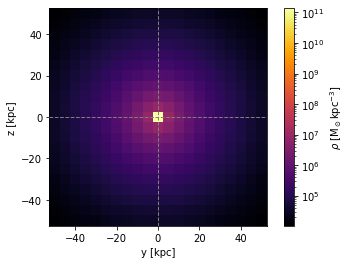

mono+dipole


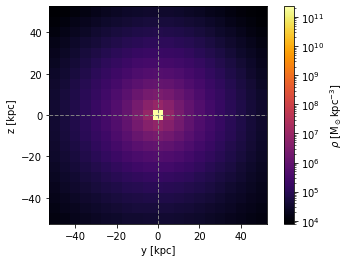

mono+quadrupole


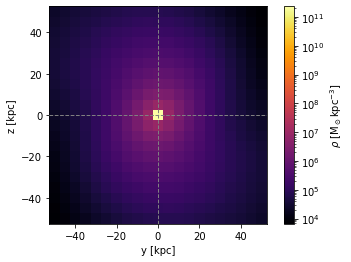

live


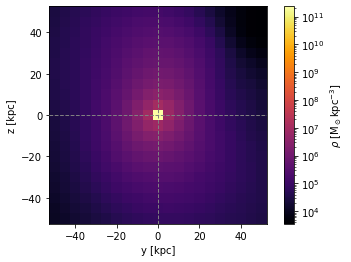

In [17]:
l_select = [0, 1, 2] 
moments = ['monopole', 'mono+dipole', 'mono+quadrupole']
t=0.

# loop over the different moments
for l in l_select:
    print(moments[l])
    flag = mwlmc_util.get_harmonic_flag([l])
    fields = Model.lmc_fields(t, X, Y, Z, lmcharmonicflag=flag)

    dens = fields[:,3]
    dens = dens.reshape((len(y), len(z)))

    fig, ax = mwlmc_plot.plot_density(Ym, Zm, dens,
                                      cmap = plt.cm.inferno, 
                                      norm = LogNorm())
    plt.show()

# and now the live LMC
print('live')
fields = Model.lmc_fields(t, X, Y, Z, globalframe=True)

dens = fields[:,3]
dens = dens.reshape((len(y), len(z)))

fig, ax = mwlmc_plot.plot_density(Ym, Zm, dens,
                                  cmap = plt.cm.inferno, 
                                  norm = LogNorm())
plt.show()


The LMC's deformations resemble the quadrupole, but there is still a difference
that needs higher moments for its explanation!

**Note**: even though it follows the same syntax, the densities for the MW 
stellar component are not implemented yet.

#### Combined forces relative to the center of the stellar component

Now we want to extract the forces from all components (relative to the MW 
center). We can use the `all_forces` function for this, again either at one 
position or over an array. Here, all three harmonic flags can be set.

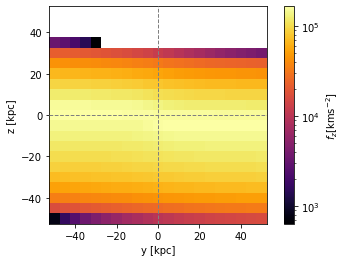

In [37]:
forces = Model.all_forces(t=0, x=np.full(len(Y), 0.01), y=Y, z=Z)
fx, fy, fz = forces[:,0], forces[:,1], forces[:,2]

# Let's have a look at the z-force
fz = fz.reshape((len(y), len(z)))

fig, ax = mwlmc_plot.plot_forces(Ym, Zm, fz,
                                  cmap = plt.cm.inferno, 
                                  norm = LogNorm())
plt.show()

#### LMC trajectory


To get the trajectory of the LMC, just call the `get_lmc_trajectory` function 
with the time step you are interested in:


In [42]:
t, lmcx, lmcy, lmcz = Model.get_lmc_trajectory(0.1).T
r = (lmcx**2 + lmcy**2 + lmcz**2)**(0.5)

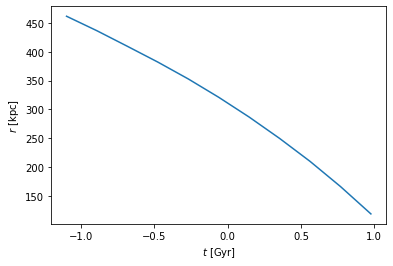

In [49]:
fig, ax = mwlmc_plot.plot_lmc_orbit(t, r)
plt.show()